In [52]:
# import libraries
import pandas as pd
import seaborn as sns

In [53]:
df = pd.read_csv('data/TWO_CENTURIES_OF_UM_RACES.csv')

/var/folders/v4/r6q4ybyd07z84hpd45lg6f3m0000gn/T/ipykernel_82071/2789373578.py:1: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/TWO_CENTURIES_OF_UM_RACES.csv')


In [54]:
# Take a look at the imported data
df.head()

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
0,2018,06.01.2018,Selva Costera (CHI),50km,22,4:51:39 h,Tnfrc,CHI,1978.0,M,M35,10.286,0
1,2018,06.01.2018,Selva Costera (CHI),50km,22,5:15:45 h,Roberto Echeverría,CHI,1981.0,M,M35,9.501,1
2,2018,06.01.2018,Selva Costera (CHI),50km,22,5:16:44 h,Puro Trail Osorno,CHI,1987.0,M,M23,9.472,2
3,2018,06.01.2018,Selva Costera (CHI),50km,22,5:34:13 h,Columbia,ARG,1976.0,M,M40,8.976,3
4,2018,06.01.2018,Selva Costera (CHI),50km,22,5:54:14 h,Baguales Trail,CHI,1992.0,M,M23,8.469,4


In [55]:
df.shape

(7461195, 13)

In [56]:
df.dtypes

Year of event                  int64
Event dates                   object
Event name                    object
Event distance/length         object
Event number of finishers      int64
Athlete performance           object
Athlete club                  object
Athlete country               object
Athlete year of birth        float64
Athlete gender                object
Athlete age category          object
Athlete average speed         object
Athlete ID                     int64
dtype: object

In [57]:
# data wanted are USA Races, 50k or 50mi, 2020

In [58]:
# Show 50k or 50mi reces
df[df['Event distance/length'] == '50km']
df.head(2)

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
0,2018,06.01.2018,Selva Costera (CHI),50km,22,4:51:39 h,Tnfrc,CHI,1978.0,M,M35,10.286,0
1,2018,06.01.2018,Selva Costera (CHI),50km,22,5:15:45 h,Roberto Echeverría,CHI,1981.0,M,M35,9.501,1


In [59]:
df[df['Event distance/length'] == '50mi']
df.head(2)

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
0,2018,06.01.2018,Selva Costera (CHI),50km,22,4:51:39 h,Tnfrc,CHI,1978.0,M,M35,10.286,0
1,2018,06.01.2018,Selva Costera (CHI),50km,22,5:15:45 h,Roberto Echeverría,CHI,1981.0,M,M35,9.501,1


In [60]:
# combine 50km/50mi with isin and the add year 2020
df[(df['Event distance/length'].isin(['50km', '50mi']))
   & (df['Year of event'] == 2020)
   ]
df.head(2)

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
0,2018,06.01.2018,Selva Costera (CHI),50km,22,4:51:39 h,Tnfrc,CHI,1978.0,M,M35,10.286,0
1,2018,06.01.2018,Selva Costera (CHI),50km,22,5:15:45 h,Roberto Echeverría,CHI,1981.0,M,M35,9.501,1


In [61]:
# Show Events in USA and clean up the cell to make it showing only USA
# df[df['Event name'] == 'Everglades 50 Mile Ultra Run (USA)']['Event name'].str.split('(').str.get(1).str.split(')').str.get(0)
df[df['Event name'].str.split('(').str.get(1).str.split(')').str.get(0) == 'USA']

df.head(2)

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
0,2018,06.01.2018,Selva Costera (CHI),50km,22,4:51:39 h,Tnfrc,CHI,1978.0,M,M35,10.286,0
1,2018,06.01.2018,Selva Costera (CHI),50km,22,5:15:45 h,Roberto Echeverría,CHI,1981.0,M,M35,9.501,1


In [62]:
# Combine all filtered data together and assign it to a variable
df2 = df[(df['Event distance/length'].isin(['50km', '50mi']))
   & (df['Year of event'] == 2020)
   & (df['Event name'].str.split('(').str.get(1).str.split(')').str.get(0) == 'USA')
   ]

In [63]:
df2.shape

(26090, 13)

In [64]:
# Remove 'USA' from ['Event name'] column
df2['Event name'] = df2['Event name'].str.split('(').str.get(0)

/var/folders/v4/r6q4ybyd07z84hpd45lg6f3m0000gn/T/ipykernel_82071/2958171471.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Event name'] = df2['Event name'].str.split('(').str.get(0)


In [65]:
# make sure 'USA' was removed
df2.head(2)

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
2539945,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,3:17:55 h,"*Normandy Park, WA",USA,1991.0,M,M23,15.158,71287
2539946,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:02:32 h,"*Gold Bar, WA",USA,1981.0,M,M35,12.369,629508


In [66]:
# clean up Athlete age category column
df2['Athlete_age'] = 2020 - df['Athlete year of birth']

/var/folders/v4/r6q4ybyd07z84hpd45lg6f3m0000gn/T/ipykernel_82071/2899597752.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Athlete_age'] = 2020 - df['Athlete year of birth']


In [67]:
# remove h from athlete performance
df2['Athlete performance'] = df2['Athlete performance'].str.split(' ').str.get(0)

/var/folders/v4/r6q4ybyd07z84hpd45lg6f3m0000gn/T/ipykernel_82071/2258589593.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Athlete performance'] = df2['Athlete performance'].str.split(' ').str.get(0)


In [68]:
df2.head(2)

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID,Athlete_age
2539945,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,3:17:55,"*Normandy Park, WA",USA,1991.0,M,M23,15.158,71287,29.0
2539946,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:02:32,"*Gold Bar, WA",USA,1981.0,M,M35,12.369,629508,39.0


In [69]:
# drop unwanted columns
# Athlete Club, Athlete Country, Athlete year of birth, Athlete ag category
df2 = df2.drop(['Athlete club', 'Athlete country', 'Athlete year of birth', 'Athlete age category'], axis=1)

In [70]:
# confirm columns were dropped
df2.head(2)

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete gender,Athlete average speed,Athlete ID,Athlete_age
2539945,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,3:17:55,M,15.158,71287,29.0
2539946,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:02:32,M,12.369,629508,39.0


In [71]:
# clean up null values
# check how many null values we have
df2.isna().sum()

Year of event                  0
Event dates                    0
Event name                     0
Event distance/length          0
Event number of finishers      0
Athlete performance            0
Athlete gender                 0
Athlete average speed          0
Athlete ID                     0
Athlete_age                  233
dtype: int64

In [72]:
# make the drop
df2 = df2.dropna()

In [73]:
# make sure it was dropped
df2.shape

(25857, 10)

In [74]:
# Check for dupes
df2[df2.duplicated() == True]  

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete gender,Athlete average speed,Athlete ID,Athlete_age


In [75]:
# reset index
df2 = df2.reset_index(drop=True)

In [76]:
df2.head(2)

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete gender,Athlete average speed,Athlete ID,Athlete_age
0,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,3:17:55,M,15.158,71287,29.0
1,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:02:32,M,12.369,629508,39.0


In [77]:
# fix data types
df2.dtypes

Year of event                  int64
Event dates                   object
Event name                    object
Event distance/length         object
Event number of finishers      int64
Athlete performance           object
Athlete gender                object
Athlete average speed         object
Athlete ID                     int64
Athlete_age                  float64
dtype: object

In [78]:
# 'Athlete_age' ---> int
df2['Athlete_age'] = df2['Athlete_age'].astype(int)

In [79]:
# 'Athlete average speed' ---> float
df2['Athlete average speed'] = df2['Athlete average speed'].astype(float)

In [80]:
# check data types was fixed
df2.dtypes

Year of event                  int64
Event dates                   object
Event name                    object
Event distance/length         object
Event number of finishers      int64
Athlete performance           object
Athlete gender                object
Athlete average speed        float64
Athlete ID                     int64
Athlete_age                    int64
dtype: object

In [81]:
# rename columns
df2 = df2.rename(columns={
    'Year of event': 'year',
    'Event dates': 'race_day',
    'Event name': 'race_name',
    'Event distance/length': 'race_length',
    'Event number of finishers': 'race_number_of_finishers',
    'Athlete performance': 'athlete_performance',
    'Athlete gender': 'athlete_gender',
    'Athlete average speed': 'athlete_average_speed',
    'Athlete ID': 'athlete_id',
    'Athlete_age': 'athlete_age'
})

In [82]:
# make sure columns were renamed
df2.head(2)

,year,race_day,race_name,race_length,race_number_of_finishers,athlete_performance,athlete_gender,athlete_average_speed,athlete_id,athlete_age
0,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,3:17:55,M,15.158,71287,29
1,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:02:32,M,12.369,629508,39


In [83]:
# reorder columns
df3 = df2[['race_day', 'race_name', 'race_length', 'race_number_of_finishers', 
           'athlete_id', 'athlete_gender', 'athlete_age', 'athlete_performance', 'athlete_average_speed','year']]

In [84]:
df3.head(2)

,race_day,race_name,race_length,race_number_of_finishers,athlete_id,athlete_gender,athlete_age,athlete_performance,athlete_average_speed,year
0,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,71287,M,29,3:17:55,15.158,2020
1,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,629508,M,39,4:02:32,12.369,2020


<Axes: xlabel='race_length', ylabel='Count'>

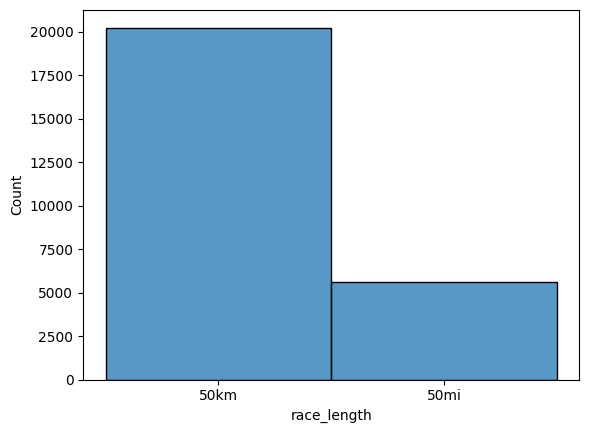

In [85]:
# Data Exploratory
sns.histplot(df3['race_length'])

<Axes: xlabel='race_length', ylabel='Count'>

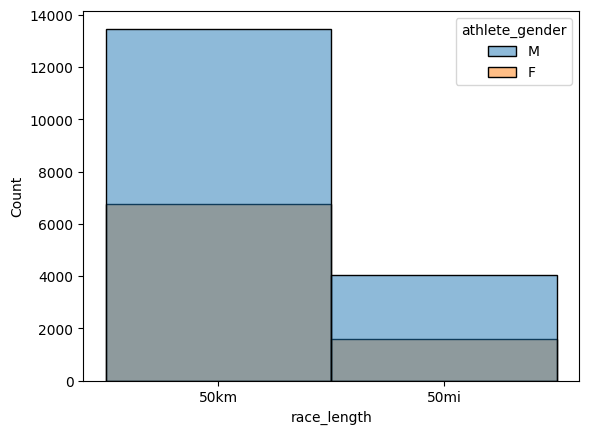

In [86]:
sns.histplot(df3, x= 'race_length', hue= 'athlete_gender')

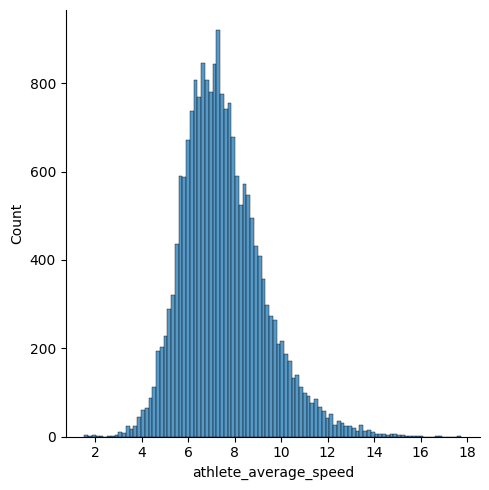

In [87]:
sns.displot(df3[df3['race_length'] == '50km']['athlete_average_speed'])


<Axes: xlabel='race_length', ylabel='athlete_average_speed'>

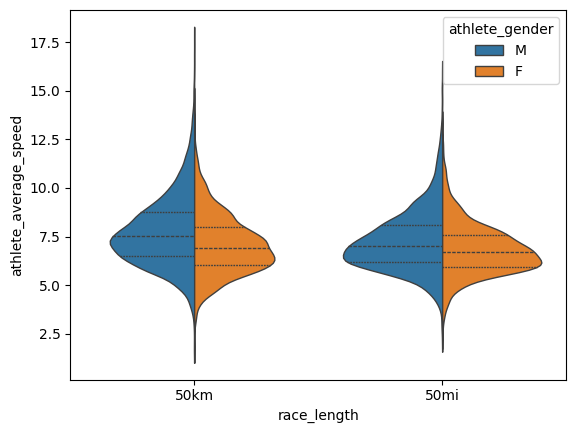

In [88]:
sns.violinplot(df3, x='race_length', y='athlete_average_speed', hue='athlete_gender', split= True, inner='quart', linewidth=1)

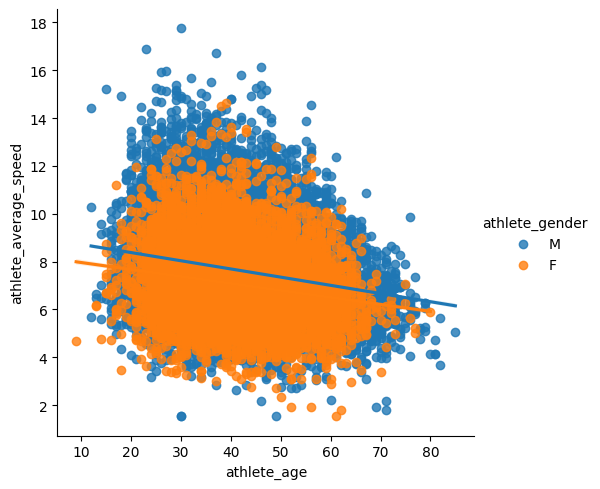

In [89]:
sns.lmplot(df3, x='athlete_age', y='athlete_average_speed', hue='athlete_gender')

In [90]:
# Difference in speed for the 50km,50min male to female?
df3.groupby(['race_length', 'athlete_gender'])['athlete_average_speed'].mean()

race_length  athlete_gender
50km         F                 7.083011
             M                 7.738985
50mi         F                 6.834371
             M                 7.257633
Name: athlete_average_speed, dtype: float64

In [91]:
# What age groups are best in the 50km race (20 + races min)
# group athlete age with average speed to get the answer
df3.query('race_length == "50mi"').groupby('athlete_age')['athlete_average_speed'].agg(['mean', 'count']).sort_values('mean', ascending=False).query('count>19').head(10)

,mean,count
athlete_age,,
29,7.902252,135
23,7.779800,55
28,7.575252,107
30,7.569204,157
25,7.540923,91
31,7.451638,138
38,7.430022,231
35,7.422359,195
36,7.403854,185


In [92]:
# What age groups are the worst in the 50km race (20 + races min)
df3.query('race_length == "50mi"').groupby('athlete_age')['athlete_average_speed'].agg(['mean', 'count']).sort_values('mean', ascending=True).query('count>19').head(10)


,mean,count
athlete_age,,
60,6.261788,33
62,6.272730,37
61,6.358355,31
63,6.514806,31
58,6.582328,67
64,6.620727,22
50,6.671541,172
59,6.672072,83
48,6.696853,136


In [93]:
# Season for the data -> Slower in summer than winter?
# Spring 3-5
# Summer 6-8
# Fall 9-11
# Winter 12-2

# Split the date and get the month
df3['race_month'] = df3['race_day'].str.split('.').str.get(1).astype(int)

/var/folders/v4/r6q4ybyd07z84hpd45lg6f3m0000gn/T/ipykernel_82071/601230033.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['race_month'] = df3['race_day'].str.split('.').str.get(1).astype(int)


In [94]:
# create a new column and find the season based on months
df3['race_season'] = df3['race_month'].apply(lambda x: 'Winter' if x > 11 else 'Fall' if x> 8 else 'Summer' if x > 5 else 'Spring' if x > 2 else 'Winter')

/var/folders/v4/r6q4ybyd07z84hpd45lg6f3m0000gn/T/ipykernel_82071/3102795751.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['race_season'] = df3['race_month'].apply(lambda x: 'Winter' if x > 11 else 'Fall' if x> 8 else 'Summer' if x > 5 else 'Spring' if x > 2 else 'Winter')


In [95]:
# group the average speed with the race season to find the answer
df3.groupby('race_season')['athlete_average_speed'].agg(['mean', 'count']).sort_values('mean', ascending=False)

,mean,count
race_season,,
Spring,7.684430,3294
Winter,7.518187,11595
Fall,7.406619,8315
Summer,6.869336,2653
